<a href="https://colab.research.google.com/github/t0mm4rx/DataCrunchHackathon/blob/master/DataCrunch_Hackathon_v4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
train_url = '-'
test_url = '-'

train_before = pd.read_pickle(train_url)
test_before = pd.read_pickle(test_url)
train_before.head()

,Feature_1_cv_enum,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14_cv_bool,Feature_15_cv_bool,Feature_16_cv_bool,Feature_17_cv_bool,Feature_18_adv_cv_bool,Feature_19_adv_cv_bool,Feature_20_adv_cv_bool,Feature_21_adv_cv_bool,Feature_22_adv_cv_bool,Feature_23_adv_cv_enum,target_r,target_g,target_b
82247,3.0,387.0,19527.0000,387,0.0000,387,38.699520,2734.620117,-0.189790,0.00,6.149803e+05,0.019819,0,1,0,0,0,0,0,0,0,1,4,1,0,1
143444,3.0,424.0,35489.4999,424,0.0000,424,NaN,NaN,NaN,0.00,4.167333e+06,0.011947,1,1,0,0,0,0,0,0,0,1,4,0,0,0
183844,3.0,253.0,243052.5175,253,0.0000,253,66.548996,2362.719971,0.129491,0.00,1.976974e+07,0.001041,1,1,0,0,0,0,0,0,0,1,4,0,0,0
156433,2.0,1526.0,111029.6685,1526,0.0000,1526,35.044918,2383.120117,0.205257,0.00,5.241259e+06,0.013744,1,0,1,0,0,1,0,0,1,0,0,0,0,0
44639,3.0,50.0,9380.2130,50,15.6942,50,NaN,NaN,NaN,784.71,1.330630e+05,0.005330,1,1,0,0,0,0,0,0,0,1,4,1,1,1


In [ ]:
train = train_before.copy()
test = test_before.copy()

for c in train.columns:
    if ("enum" in c):
        dummies = pd.get_dummies(train[c], prefix=c)
        train.drop(columns=[c], inplace=True)
        train = pd.concat([dummies, train], axis=1)

for c in test.columns:
    if ("enum" in c):
        dummies = pd.get_dummies(test[c], prefix=c)
        test.drop(columns=[c], inplace=True)
        test = pd.concat([dummies, test], axis=1)

for c in train.columns:
    train[c] = train[c].fillna(train[c].mean())
    if (not "target" in c):
        test[c] = test[c].fillna(train[c].mean())
        test[c] = test[c].clip(
            train[c].quantile(0.01),
            train[c].quantile(0.99)
        )
        train[c] -= train[c].mean()
        train[c] /= train[c].std()
    train[c] = train[c].clip(
        train[c].quantile(0.01),
        train[c].quantile(0.99)
    )

print(train.head())
print(test.head())

NameError: ignored

In [ ]:
features = train.drop(columns=['target_r', 'target_g', 'target_b'])
print(features.head())

pca = PCA(n_components=10)
pcs = pca.fit_transform(features)
print(pcs.shape)
print("PCA keeps {:.6f}% of variance".format(pca.explained_variance_ratio_.sum() * 100))

        Feature_23_adv_cv_enum_0  ...  Feature_22_adv_cv_bool
82247                          0  ...                       1
143444                         0  ...                       1
183844                         0  ...                       1
156433                         1  ...                       0
44639                          0  ...                       1

[5 rows x 30 columns]
(300000, 10)
PCA keeps 100.000000% of variance


In [ ]:
targets = train['target_r'].values
print(pcs.shape)
print(targets.shape)
model_r = xgb.XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=2000)
model_r.fit(pcs[:100000], targets[:100000])
test_model(model_r, pcs[:-2000], targets[:-2000])

NameError: ignored

In [ ]:
targets = train[['target_r', 'target_g', 'target_b']].values
test_features = test.values
features = train.drop(columns=['target_r', 'target_g', 'target_b']).values
print(targets.shape)
print(features.shape)

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets)
print("Train size: {}".format(x_train.shape[0]))
print("Test size: {}".format(x_test.shape[0]))
print("To guess size: {}".format(test_features.shape[0]))

(300000, 3)
(300000, 30)
Train size: 210000
Test size: 90000
To guess size: 39924


In [ ]:
def test_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print(metrics.classification_report(y_pred, y_test))
    plt.hist(y_pred)
    plt.plot()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6556633	test: 0.6570174	best: 0.6570174 (0)	total: 4.09s	remaining: 54m 30s
1:	learn: 0.6304790	test: 0.6329191	best: 0.6329191 (1)	total: 8.1s	remaining: 53m 51s
2:	learn: 0.6142747	test: 0.6182300	best: 0.6182300 (2)	total: 12.1s	remaining: 53m 37s
3:	learn: 0.6030248	test: 0.6083419	best: 0.6083419 (3)	total: 16.1s	remaining: 53m 32s
4:	learn: 0.5952979	test: 0.6013164	best: 0.6013164 (4)	total: 20.1s	remaining: 53m 19s
5:	learn: 0.5892770	test: 0.5971699	best: 0.5971699 (5)	total: 24.1s	remaining: 53m 12s
6:	learn: 0.5844316	test: 0.5939931	best: 0.5939931 (6)	total: 28.1s	remaining: 52m 59s
7:	learn: 0.5803245	test: 0.5905877	best: 0.5905877 (7)	total: 32.3s	remaining: 53m 19s
8:	learn: 0.5769394	test: 0.5885718	best: 0.5885718 (8)	total: 36.4s	remaining: 53m 19s
9:	learn: 0.5733654	test: 0.5868004	best: 0.5868004 (9)	total: 40.4s	remaining: 53m 13s
10:	learn: 0.5702569	test: 0.5853683	best: 0.5853683 (10)	total: 44.4s	remaining: 53m 7s
11:	learn: 0.5680709	test: 0.583

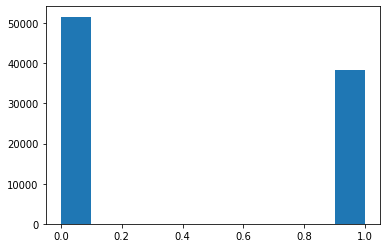

In [ ]:
import catboost
from sklearn.model_selection import GridSearchCV

# params = {'iterations': [50],
#           'depth': [5, 10, 14, 16],
#           'l2_leaf_reg': np.logspace(-20, -19, 3),
#           'leaf_estimation_iterations': [6, 7, 8],
#           'verbose': [True],
#          }
cboost = catboost.CatBoostClassifier(iterations=800, learning_rate=0.1, depth=16)
cboost.fit(x_train, y_train[:, 0], verbose=True, plot=True, eval_set=(x_test, y_test[:, 0]))
test_model(cboost, x_test, y_test[:, 0])
# cboost = catboost.CatBoostClassifier()
# grid = GridSearchCV(estimator=cboost, param_grid=params, cv=5)
# grid.fit(x_train, y_train[:, 0])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6517617	test: 0.6533665	best: 0.6533665 (0)	total: 5.25s	remaining: 1h 9m 56s
1:	learn: 0.6263515	test: 0.6286220	best: 0.6286220 (1)	total: 9.37s	remaining: 1h 2m 20s
2:	learn: 0.6108853	test: 0.6152466	best: 0.6152466 (2)	total: 13.5s	remaining: 59m 42s
3:	learn: 0.5996446	test: 0.6053105	best: 0.6053105 (3)	total: 17.5s	remaining: 58m 5s
4:	learn: 0.5906037	test: 0.5979689	best: 0.5979689 (4)	total: 21.6s	remaining: 57m 10s
5:	learn: 0.5842300	test: 0.5927513	best: 0.5927513 (5)	total: 25.6s	remaining: 56m 32s
6:	learn: 0.5795320	test: 0.5890981	best: 0.5890981 (6)	total: 29.7s	remaining: 55m 59s
7:	learn: 0.5749496	test: 0.5855503	best: 0.5855503 (7)	total: 33.7s	remaining: 55m 38s
8:	learn: 0.5717823	test: 0.5833369	best: 0.5833369 (8)	total: 37.8s	remaining: 55m 18s
9:	learn: 0.5687641	test: 0.5815228	best: 0.5815228 (9)	total: 41.8s	remaining: 55m 1s
10:	learn: 0.5657869	test: 0.5791857	best: 0.5791857 (10)	total: 45.8s	remaining: 54m 43s
11:	learn: 0.5636815	test: 0

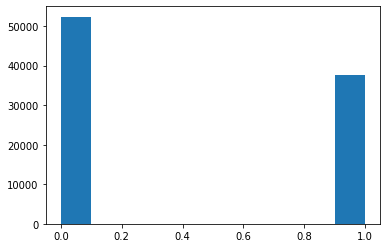

In [ ]:
cboost_g = catboost.CatBoostClassifier(iterations=800, learning_rate=0.1, depth=16)
cboost_g.fit(x_train, y_train[:, 1], verbose=True, plot=True, eval_set=(x_test, y_test[:, 1]))
test_model(cboost_g, x_test, y_test[:, 1])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6486877	test: 0.6500385	best: 0.6500385 (0)	total: 4.48s	remaining: 59m 42s
1:	learn: 0.6191482	test: 0.6212034	best: 0.6212034 (1)	total: 8.52s	remaining: 56m 39s
2:	learn: 0.6032660	test: 0.6065157	best: 0.6065157 (2)	total: 12.6s	remaining: 55m 52s
3:	learn: 0.5921230	test: 0.5965293	best: 0.5965293 (3)	total: 16.7s	remaining: 55m 17s
4:	learn: 0.5835408	test: 0.5893079	best: 0.5893079 (4)	total: 20.8s	remaining: 55m 5s
5:	learn: 0.5764314	test: 0.5833182	best: 0.5833182 (5)	total: 24.9s	remaining: 54m 55s
6:	learn: 0.5703397	test: 0.5782956	best: 0.5782956 (6)	total: 29s	remaining: 54m 42s
7:	learn: 0.5654729	test: 0.5744258	best: 0.5744258 (7)	total: 33s	remaining: 54m 24s
8:	learn: 0.5612651	test: 0.5720335	best: 0.5720335 (8)	total: 37s	remaining: 54m 10s
9:	learn: 0.5574622	test: 0.5697162	best: 0.5697162 (9)	total: 41s	remaining: 53m 55s
10:	learn: 0.5537747	test: 0.5677434	best: 0.5677434 (10)	total: 45s	remaining: 53m 46s
11:	learn: 0.5506598	test: 0.5659398	best

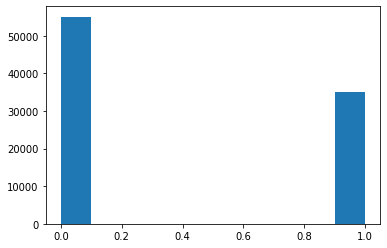

In [ ]:
cboost_b = catboost.CatBoostClassifier(iterations=800, learning_rate=0.1, depth=16)
cboost_b.fit(x_train, y_train[:, 2], verbose=True, plot=True, eval_set=(x_test, y_test[:, 2]))
test_model(cboost_b, x_test, y_test[:, 2])

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     88547
           1       0.67      0.70      0.69     61453

    accuracy                           0.74    150000
   macro avg       0.73      0.73      0.73    150000
weighted avg       0.74      0.74      0.74    150000



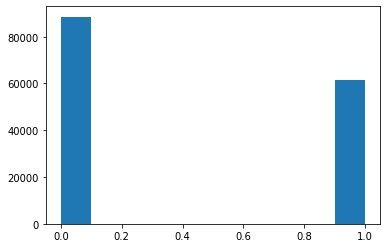

In [ ]:
model_r = xgb.XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=4000, colsample_bytree=0.1)
amodel_r.fit(x_train, y_train[:, 0])
test_model(model_r, x_test, y_test[:, 0])

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     88446
           1       0.75      0.77      0.76     61554

    accuracy                           0.80    150000
   macro avg       0.79      0.79      0.79    150000
weighted avg       0.80      0.80      0.80    150000



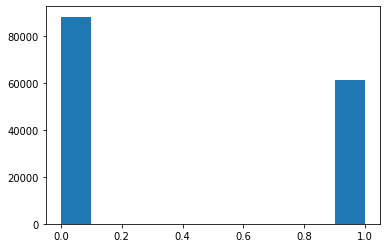

In [ ]:
model_g = xgb.XGBClassifier(max_depth=14, learning_rate=0.01, n_estimators=6000, colsample_bytree=0.1)
model_g.fit(x_train, y_train[:, 1])
test_model(model_g, x_test, y_test[:, 1])

              precision    recall  f1-score   support

           0       0.86      0.83      0.85     93658
           1       0.73      0.78      0.76     56342

    accuracy                           0.81    150000
   macro avg       0.80      0.81      0.80    150000
weighted avg       0.81      0.81      0.81    150000



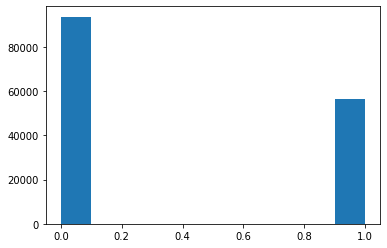

In [ ]:
model_b = xgb.XGBClassifier(max_depth=14, learning_rate=0.01, n_estimators=6000, colsample_bytree=0.1)
model_b.fit(x_train, y_train[:, 2])
test_model(model_b, x_test, y_test[:, 2])

In [ ]:
result = pd.DataFrame()
result['target_r'] = cboost.predict(test_features)
result['target_g'] = cboost_g.predict(test_features)
result['target_b'] = cboost_b.predict(test_features)
result.to_csv('result.csv', index=False)